In [1]:
import glob
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as se
from pandas.plotting import parallel_coordinates
%matplotlib inline
plt.rcParams.update({'font.size': 30})
%reload_ext autoreload
%autoreload 2
from ipywidgets import interact
# define jupyter size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
os.chdir('E:/sven/git/cardio')

# Load Excel as Dataframe

In [2]:
df_ = pd.read_excel('data/interim/sandy_data.xlsx', header=[0,1], error_bad_lines=False)
df_

Number of Physician                Age N. Mitral Valve Repairs  \
    Unnamed: 0_level_1 Unnamed: 1_level_1      Unnamed: 2_level_1   
0                  1.0          42.000000                1.000000   
1                  2.0          33.000000                4.000000   
2                  3.0          43.000000              150.000000   
3                  4.0                NaN                     NaN   
4                  5.0          31.000000                8.000000   
5                  6.0          30.000000                0.000000   
6                  7.0          39.000000              100.000000   
7                  8.0          48.000000               20.000000   
8                  9.0          49.000000              130.000000   
9                 10.0          55.000000             1200.000000   
10                11.0          61.000000              120.000000   
11                12.0          34.000000                0.000000   
12                13.0          36.000000                0.000000   
13                14.0          35.000000                0.000000   
14                15.0          31.000000                0.000000   
15                16.0          54.000000              200.000000   
16                17.0          49.000000              400.000000   
17                18.0          58.000000              300.000000   
18                19.0          58.000000              250.000000   
19                20.0          38.000000                6.000000   
20                21.0          35.000000                0.000000   
21                22.0          39.000000                5.000000   
22                 NaN                NaN                     NaN   
23                 NaN          42.761905              137.809524   
24                 NaN          10.019505              270.001966   
25                 NaN           2.136166               57.564613   

   Years of clinical Experiences             Expert  Pathology             \
              Unnamed: 3_level_1 Unnamed: 4_level_1 P2 Prolaps Prolaps P3   
0                       9.000000                0.0        0.0        0.0   
1                       8.000000                0.0        1.0        0.0   
2                      17.000000                1.0        1.0        1.0   
3                            NaN                NaN        1.0        0.0   
4                       7.000000                0.0        1.0        0.0   
5                       5.000000                0.0        1.0        0.0   
6                      13.000000                1.0        1.0        1.0   
7                      24.000000                0.0        1.0        1.0   
8                      24.000000                1.0        1.0        0.0   
9                      35.000000                1.0        1.0        0.0   
10                     30.000000                1.0        1.0        0.0   
11                      7.000000                0.0        0.0        0.0   
12                     11.000000                0.0        1.0        1.0   
13                      8.000000                0.0        1.0        1.0   
14                      6.000000                0.0        1.0        0.0   
15                     29.000000                1.0        1.0        0.0   
16                     25.000000                1.0        1.0        0.0   
17                     35.000000                1.0        1.0        1.0   
18                     58.000000                1.0        1.0        0.0   
19                     13.000000                0.0        1.0        0.0   
20                     10.000000                0.0        1.0        1.0   
21                     14.000000                0.0        1.0        0.0   
22                           NaN                NaN        NaN        NaN   
23                     18.476190                9.0       20.0        7.0   
24                     13.370187                NaN        NaN      

# Minor cleaning

In [3]:

# remove mean scores, cut lower rows
df = df_[0:21]

# transform to simple headers, remove Unnamed from header
df.columns = df.columns.map(''.join)
df.columns = df.columns.str.replace('Unnamed:', '')

# drop columns with NaNs (e.g. Repair StrategiesAnnuloplasty.1)
# or fill nan (e.g. row 3 in some columns)
df = df.fillna(0)
df = df.drop(axis=1, columns=['Repair StrategiesAnnuloplasty.1'])

# drop columns with no message (e.g. Repair StrategiesAnnuloplasty == 1 for all rows )
df = df.drop(axis=1, columns=['Repair StrategiesAnnuloplasty'])
df = df.drop(axis=1, columns=['Number of Physician 0_level_1'])

df

,Age 1_level_1,N. Mitral Valve Repairs 2_level_1,Years of clinical Experiences 3_level_1,Expert 4_level_1,PathologyP2 Prolaps,PathologyProlaps P3,PathologyA2 Prolaps,Physio II Ring Size 8_level_1,Repair StrategiesResection,Repair StrategiesNeochorde
0,42.0,1.0,9.0,0.0,0.0,0.0,1.0,38.0,0.0,1.0
1,33.0,4.0,8.0,0.0,1.0,0.0,0.0,38.0,1.0,0.0
2,43.0,150.0,17.0,1.0,1.0,1.0,0.0,40.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,0.0,1.0
4,31.0,8.0,7.0,0.0,1.0,0.0,0.0,34.0,1.0,1.0
5,30.0,0.0,5.0,0.0,1.0,0.0,0.0,38.0,1.0,0.0
6,39.0,100.0,13.0,1.0,1.0,1.0,0.0,34.0,1.0,0.0
7,48.0,20.0,24.0,0.0,1.0,1.0,1.0,36.0,0.0,1.0
8,49.0,130.0,24.0,1.0,1.0,0.0,0.0,36.0,1.0,0.0
9,55.0,1200.0,35.0,1.0,1.0,0.0,0.0,34.0,1.0,0.0


In [4]:
df.columns

Index(['Age 1_level_1', 'N. Mitral Valve Repairs 2_level_1',
       'Years of clinical Experiences 3_level_1', 'Expert 4_level_1',
       'PathologyP2 Prolaps', 'PathologyProlaps P3', 'PathologyA2 Prolaps',
       'Physio II Ring Size 8_level_1', 'Repair StrategiesResection',
       'Repair StrategiesNeochorde'],
      dtype='object')

In [5]:
# change order of columns
df = df[[ 'Age 1_level_1',
       'N. Mitral Valve Repairs 2_level_1',
       'Years of clinical Experiences 3_level_1',
        'Expert 4_level_1',
       'PathologyP2 Prolaps',
         'PathologyProlaps P3',
         'PathologyA2 Prolaps',
       'Repair StrategiesResection',
       'Repair StrategiesNeochorde',
        'Physio II Ring Size 8_level_1']]

In [6]:
# rename columns
df.columns = ['Age', 'Number MVR', 'Years of Clinical Experience', 'Expert Level', 'Pathology: Prolapse P2', 'Pathology: Prolapse P3', 'Pathology: Prolapse A2', 'Repair Strategy: Leaflet', 'Repair Strategy: Neo-chordae', 'Repair Strategy: C-E Physio II Ring Size']
df.head()

,Age,Number MVR,Years of Clinical Experience,Expert Level,Pathology: Prolapse P2,Pathology: Prolapse P3,Pathology: Prolapse A2,Repair Strategy: Leaflet,Repair Strategy: Neo-chordae,Repair Strategy: C-E Physio II Ring Size
0,42.0,1.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,38.0
1,33.0,4.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0
2,43.0,150.0,17.0,1.0,1.0,1.0,0.0,0.0,1.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,36.0
4,31.0,8.0,7.0,0.0,1.0,0.0,0.0,1.0,1.0,34.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
Age                                         21 non-null float64
Number MVR                                  21 non-null float64
Years of Clinical Experience                21 non-null float64
Expert Level                                21 non-null float64
Pathology: Prolapse P2                      21 non-null float64
Pathology: Prolapse P3                      21 non-null float64
Pathology: Prolapse A2                      21 non-null float64
Repair Strategy: Leaflet                    21 non-null float64
Repair Strategy: Neo-chordae                21 non-null float64
Repair Strategy: C-E Physio II Ring Size    21 non-null float64
dtypes: float64(10)
memory usage: 1.7 KB


In [8]:
df.columns

Index(['Age', 'Number MVR', 'Years of Clinical Experience', 'Expert Level',
       'Pathology: Prolapse P2', 'Pathology: Prolapse P3',
       'Pathology: Prolapse A2', 'Repair Strategy: Leaflet',
       'Repair Strategy: Neo-chordae',
       'Repair Strategy: C-E Physio II Ring Size'],
      dtype='object')

In [9]:
# show target column values
df['Expert Level']

0     0.0
1     0.0
2     1.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    1.0
17    1.0
18    1.0
19    0.0
20    0.0
Name: Expert Level, dtype: float64

# Scale all numeric columns to values between 0 and 1

In [10]:
selected_data_norm = df
# (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# need to rescale column wise
#selected_data_norm['Number of Physician 0_level_1'] /= selected_data_norm['Number of Physician 0_level_1'].max()
selected_data_norm['Age'] /= selected_data_norm['Age'].max()
selected_data_norm['Number MVR'] /= selected_data_norm['Number MVR'].max()
selected_data_norm['Years of Clinical Experience'] /= selected_data_norm['Years of Clinical Experience'].max()
selected_data_norm['Repair Strategy: C-E Physio II Ring Size'] = (selected_data_norm['Repair Strategy: C-E Physio II Ring Size'] - selected_data_norm['Repair Strategy: C-E Physio II Ring Size'].min()) / (selected_data_norm['Repair Strategy: C-E Physio II Ring Size'].max() - selected_data_norm['Repair Strategy: C-E Physio II Ring Size'].min())

selected_data_norm

,Age,Number MVR,Years of Clinical Experience,Expert Level,Pathology: Prolapse P2,Pathology: Prolapse P3,Pathology: Prolapse A2,Repair Strategy: Leaflet,Repair Strategy: Neo-chordae,Repair Strategy: C-E Physio II Ring Size
0,0.688525,0.000833,0.155172,0.0,0.0,0.0,1.0,0.0,1.0,0.666667
1,0.540984,0.003333,0.137931,0.0,1.0,0.0,0.0,1.0,0.0,0.666667
2,0.704918,0.125000,0.293103,1.0,1.0,1.0,0.0,0.0,1.0,1.000000
3,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.333333
4,0.508197,0.006667,0.120690,0.0,1.0,0.0,0.0,1.0,1.0,0.000000
5,0.491803,0.000000,0.086207,0.0,1.0,0.0,0.0,1.0,0.0,0.666667
6,0.639344,0.083333,0.224138,1.0,1.0,1.0,0.0,1.0,0.0,0.000000
7,0.786885,0.016667,0.413793,0.0,1.0,1.0,1.0,0.0,1.0,0.333333
8,0.803279,0.108333,0.413793,1.0,1.0,0.0,0.0,1.0,0.0,0.333333
9,0.901639,1.000000,0.603448,1.0,1.0,0.0,0.0,1.0,0.0,0.000000


In [147]:
# test for dataincreasing
#selected_data_norm.loc[1, 'Physio II Ring Size 8_level_1'] = selected_data_norm.loc[1, 'Physio II Ring Size 8_level_1'] + 0.001

#selected_data_norm.loc[1, 'Repair StrategiesResection'] = selected_data_norm.loc[1, 'Repair StrategiesResection'] + 0.01



KeyError: 'Repair StrategiesResection'

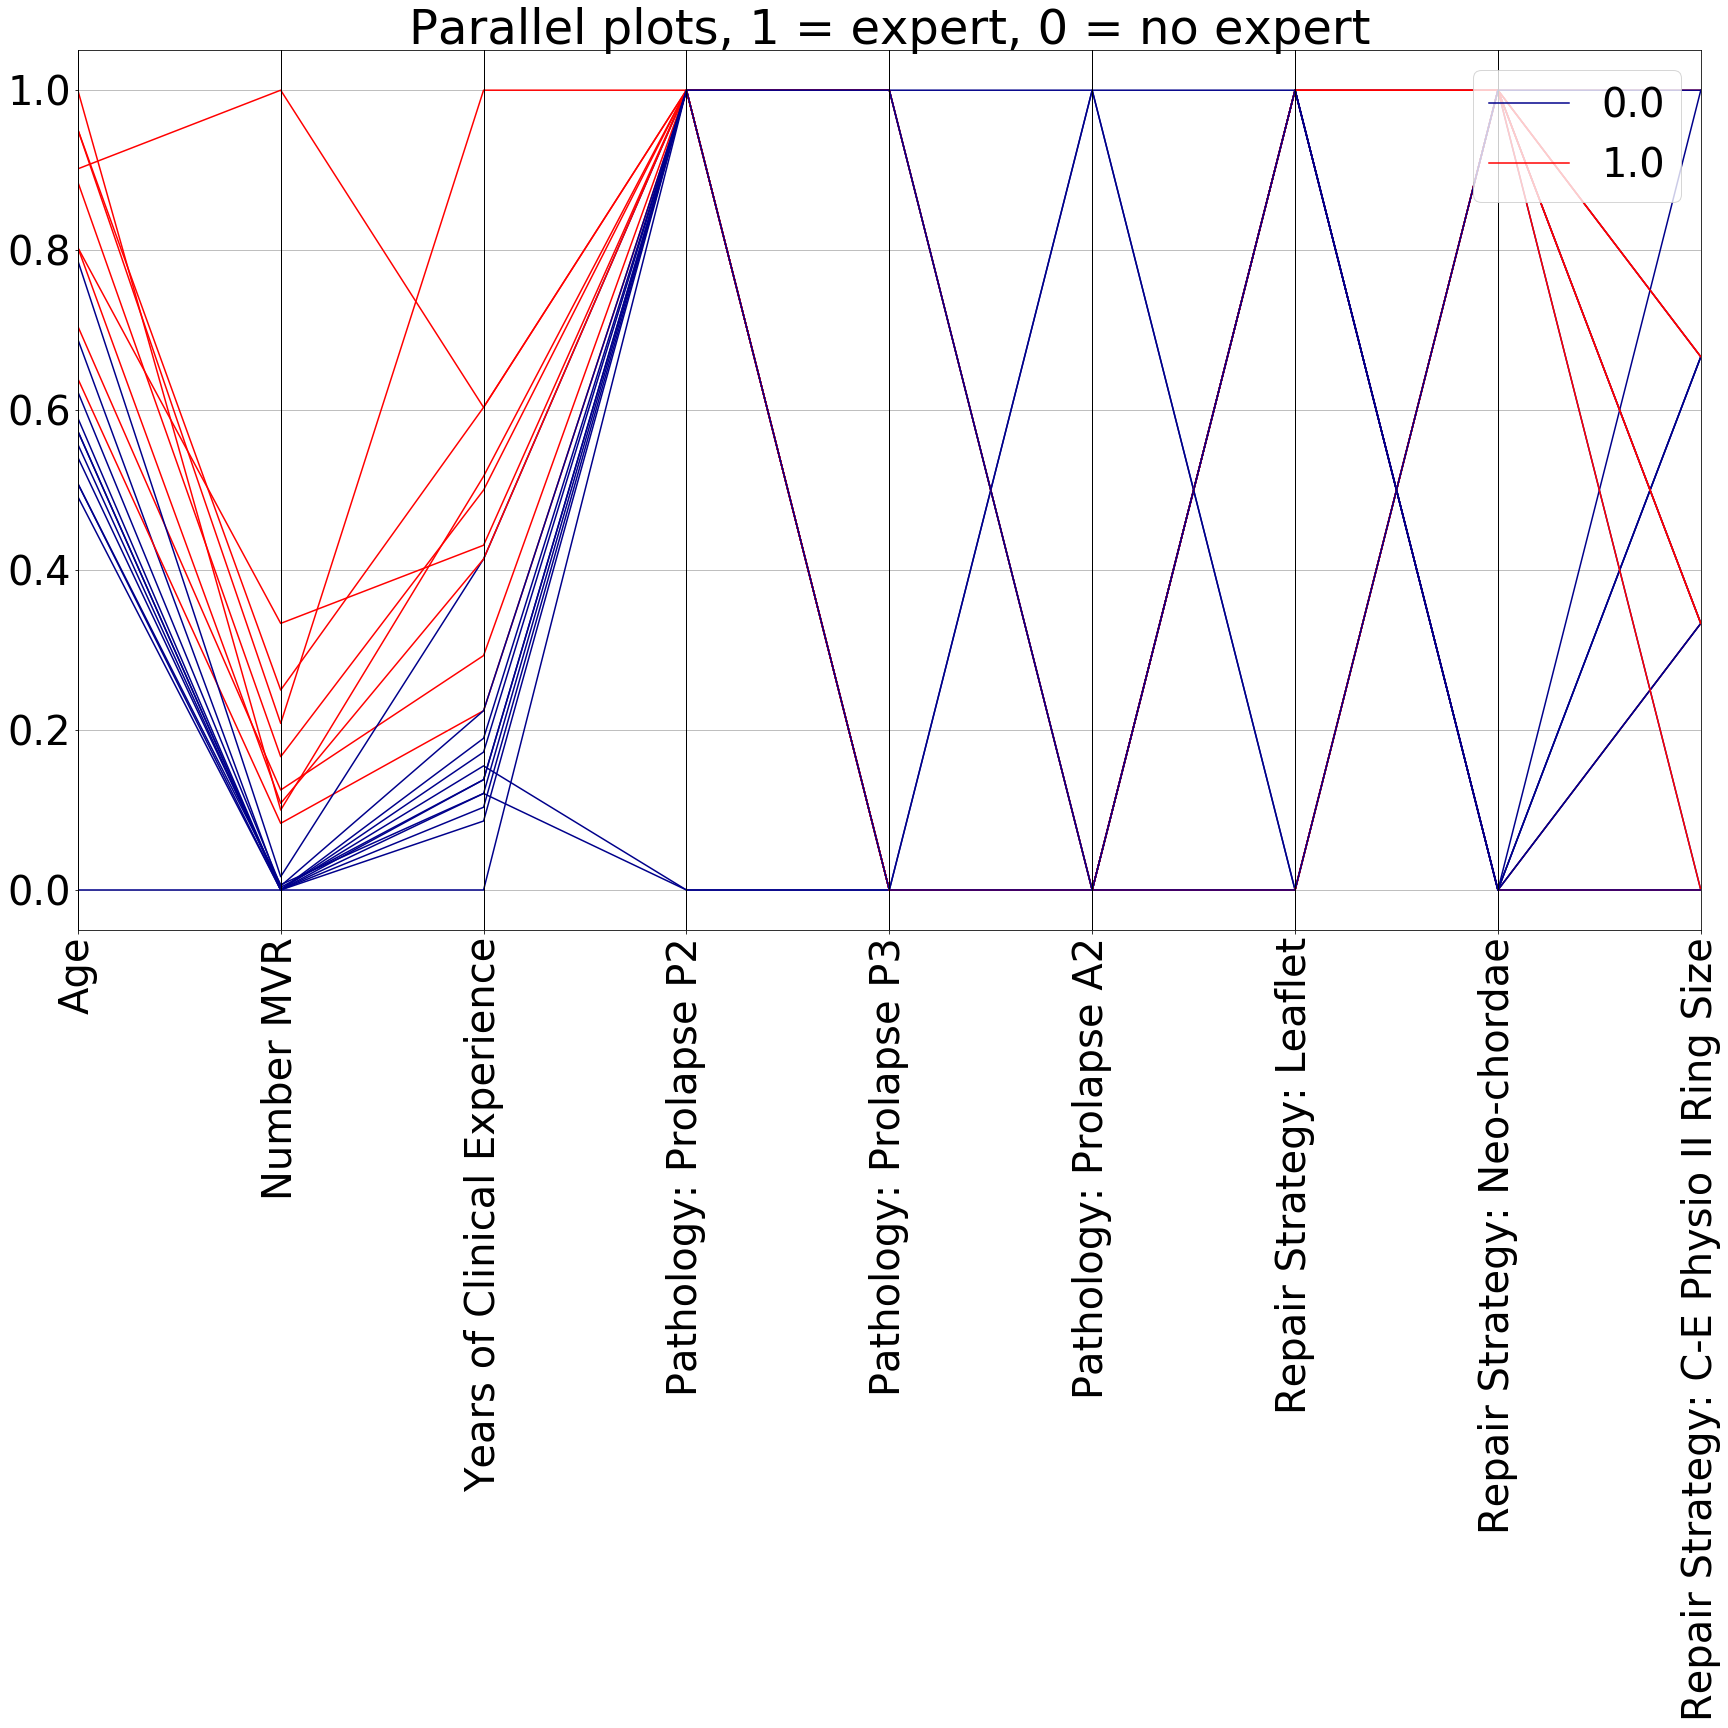

In [11]:
plt.rcParams.update({'font.size': 40})

fig, ax = plt.subplots(figsize=(25,25))
ax = parallel_coordinates(selected_data_norm, "Expert Level", ax=ax, color=('darkblue', 'red'), sort_labels=True)
ax.set_title('Parallel plots, 1 = expert, 0 = no expert')
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:

def plot_radar_chart(df, index=0, ax=None):
    
    """
    creates a radar plot for one row, defined by index
    creates a new axis if non is provided, draw on provided else
    dataframe needs the structure: one entity per row, each column = one attribute
    """
    colours = ['b', 'g', 'r', 'c', 'm']

    from math import pi

    # number of variables, ignore column 0 if it is the index
    if list(df)[0] == 'index':
        categories=list(df)[1:]
    else:
        categories=list(df)
    N = len(categories)

    # We are going to plot the n line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df[categories].loc[index].values.flatten().tolist()
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise a new figure for the spider plot if no axis are given
    if ax is None:
        f = plt.figure(figsize=(15,15))
        ax = f.add_subplot(111, polar=True)

    # Draw one axe per variable + add labels yet
    plt.xticks(angles[:-1], categories, size=20)
    #plt.xticks(angles[:-1], [], size=20) # remove category names

    # Plot data
    ax.plot(angles, values, linewidth=3, linestyle='solid')

    # Fill area
    ax.fill(angles, values, alpha=0.1)
    #ax.fill(angles, values, 'b', alpha=0.1)

    #plt.title(df['Number of PhysicianUnnamed: 0_level_1'].loc[index])
    plt.tight_layout()
    return ax

    

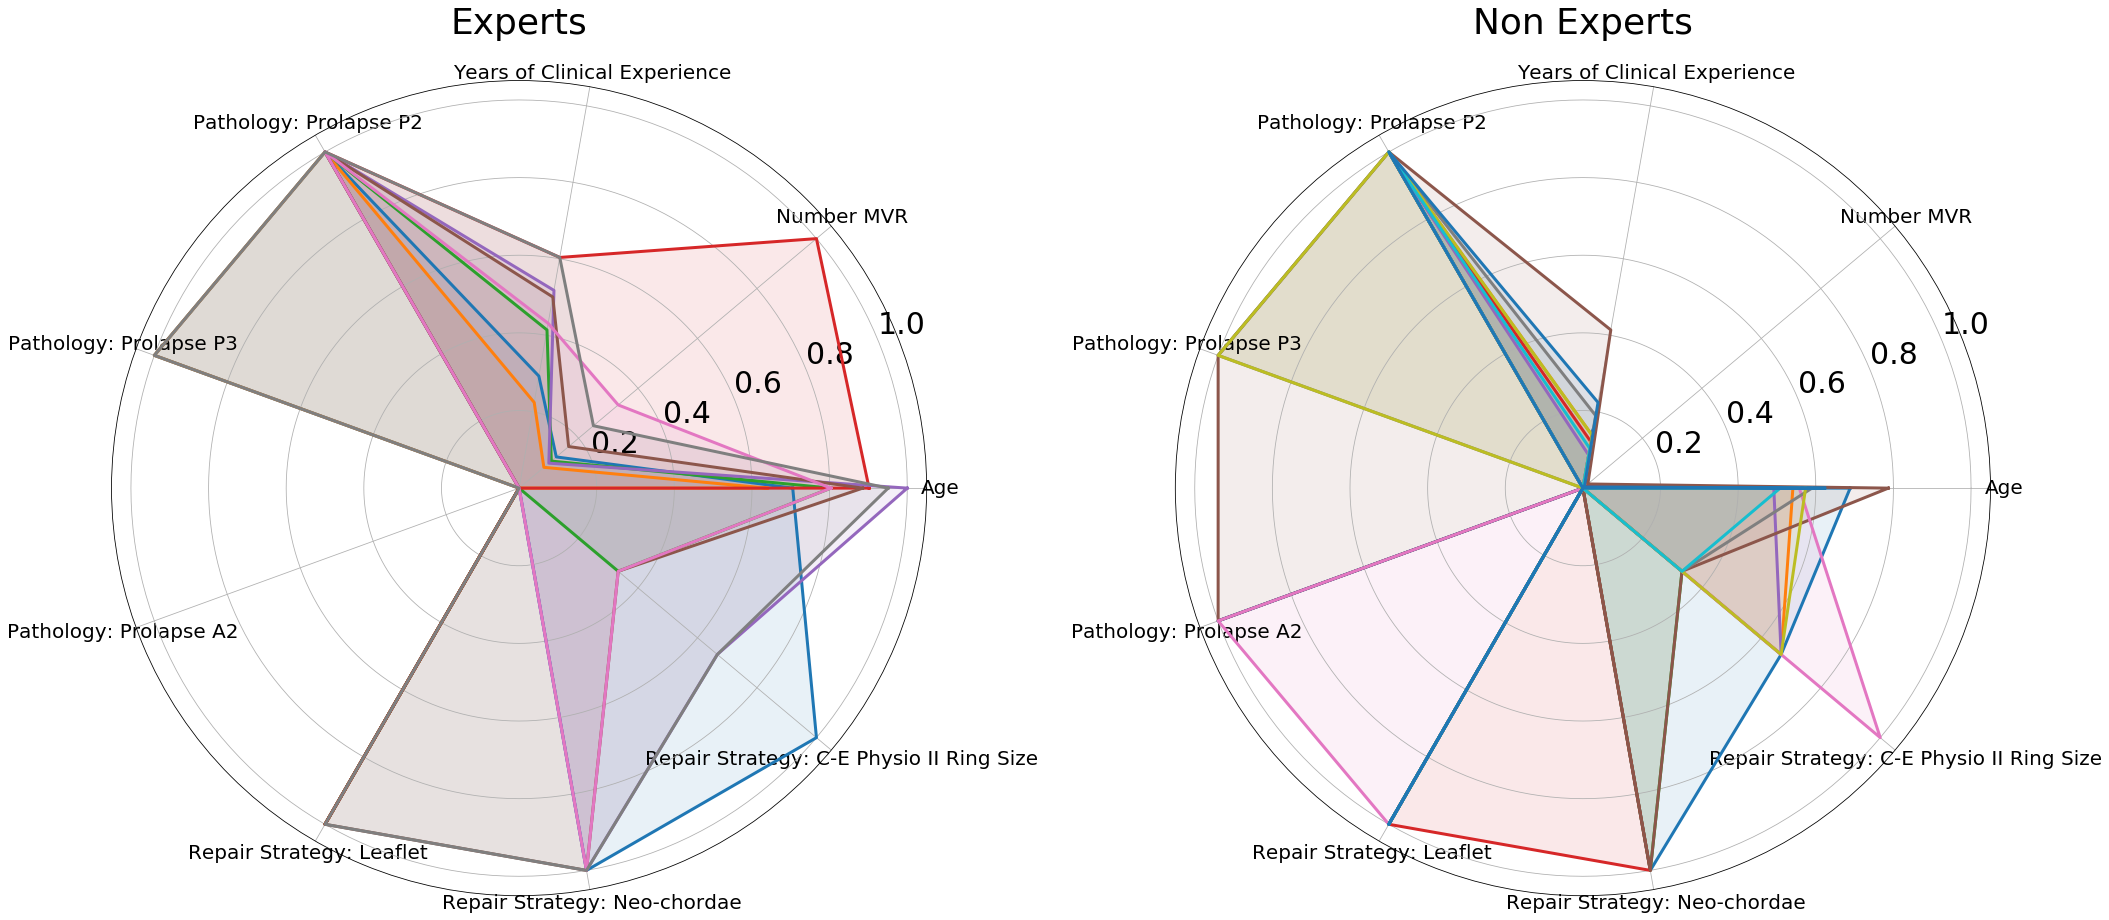

In [13]:
df_pos = selected_data_norm[selected_data_norm['Expert Level'] == 1].drop('Expert Level', axis=1)
df_pos.reset_index(inplace=True)
plt.rcParams.update({'font.size': 30})
f = plt.figure(figsize=(30,15))
ax = f.add_subplot(121, polar=True)
for i in range(len(df_pos)-1):
    ax = plot_radar_chart(df_pos, i, ax)
    ax.set_title('Experts')
    
df_pos = selected_data_norm[selected_data_norm['Expert Level'] == 0].drop('Expert Level', axis=1)
df_pos.reset_index(inplace=True)

ax = f.add_subplot(122, polar=True)
for i in range(len(df_pos)-1):
    ax = plot_radar_chart(df_pos, i, ax)
    ax.set_title('Non Experts')
plt.tight_layout()
plt.show()

# mean of experts vs non experts

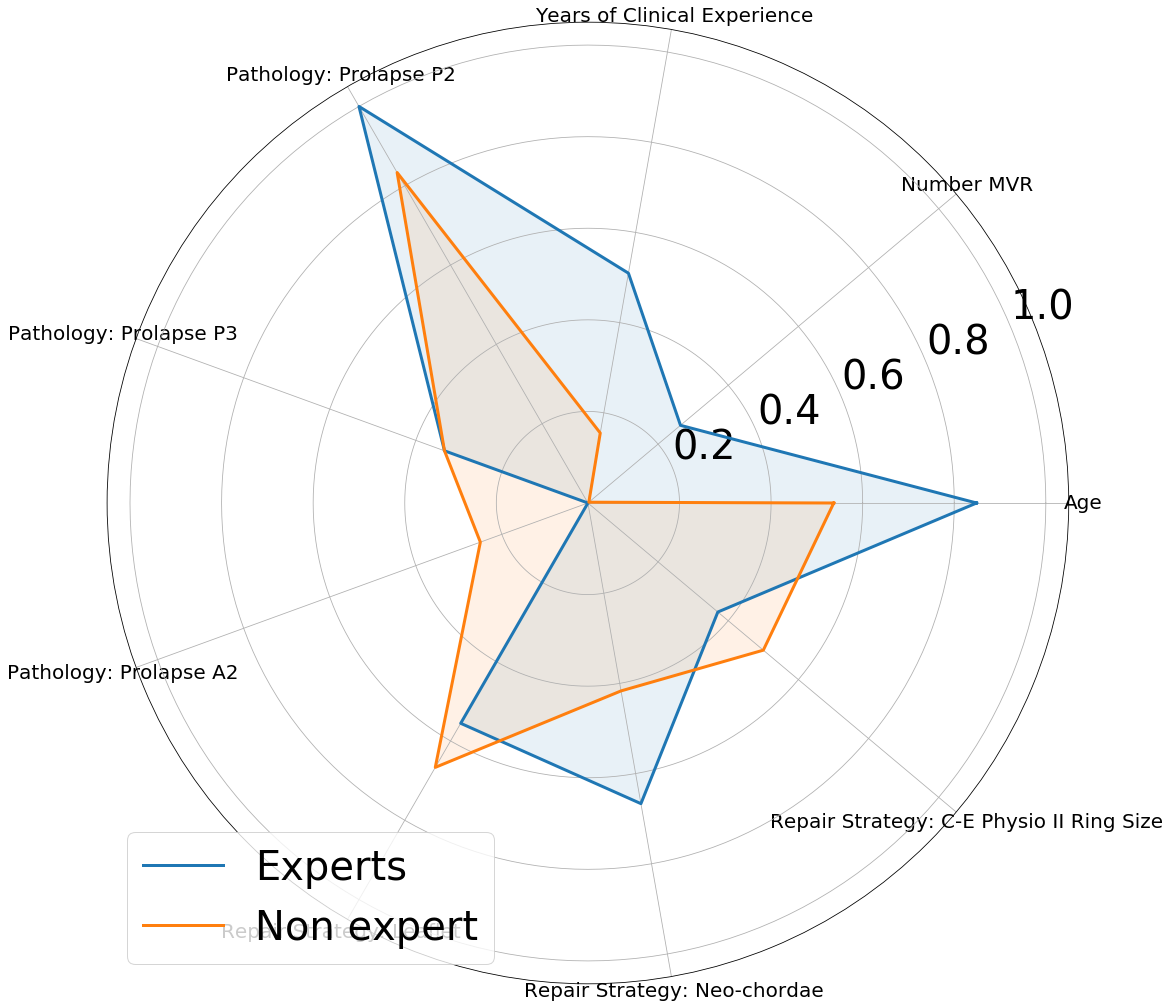

In [14]:
# plot average shape infos for outcome = 1
df_expert = selected_data_norm[selected_data_norm['Expert Level'] == 1].drop('Expert Level', axis=1)
df_expert.reset_index(inplace=True)
df_temp = pd.DataFrame(columns=df_expert.columns)
df_temp.loc[0] = df_expert.mean().values
# define figure
plt.rcParams.update({'font.size': 40})
f = plt.figure(figsize=(30,15))
ax = f.add_subplot(111, polar=True)
# draw and update axis
ax = plot_radar_chart(df_temp, 0, ax)
# plot average shape infos for outcome = 0
df_expert = selected_data_norm[selected_data_norm['Expert Level'] == 0].drop('Expert Level', axis=1)
df_expert.reset_index(inplace=True)
df_temp = pd.DataFrame(columns=df_expert.columns)
df_temp.loc[0] = df_expert.mean().values
# draw and update axis
ax = plot_radar_chart(df_temp, 0, ax)
plt.tight_layout()
plt.legend(['Experts', 'Non expert']) # remove legend


#### special remove labels and legend comands
#cur_axes = plt.gca()
#cur_axes.axes.get_xaxis().set_ticks([]) #  remove ticks and labels
#cur_axes.axes.get_yaxis().set_ticklabels([]) # remove only the labels (0.2, 0.4 etc.)

No handles with labels found to put in legend.


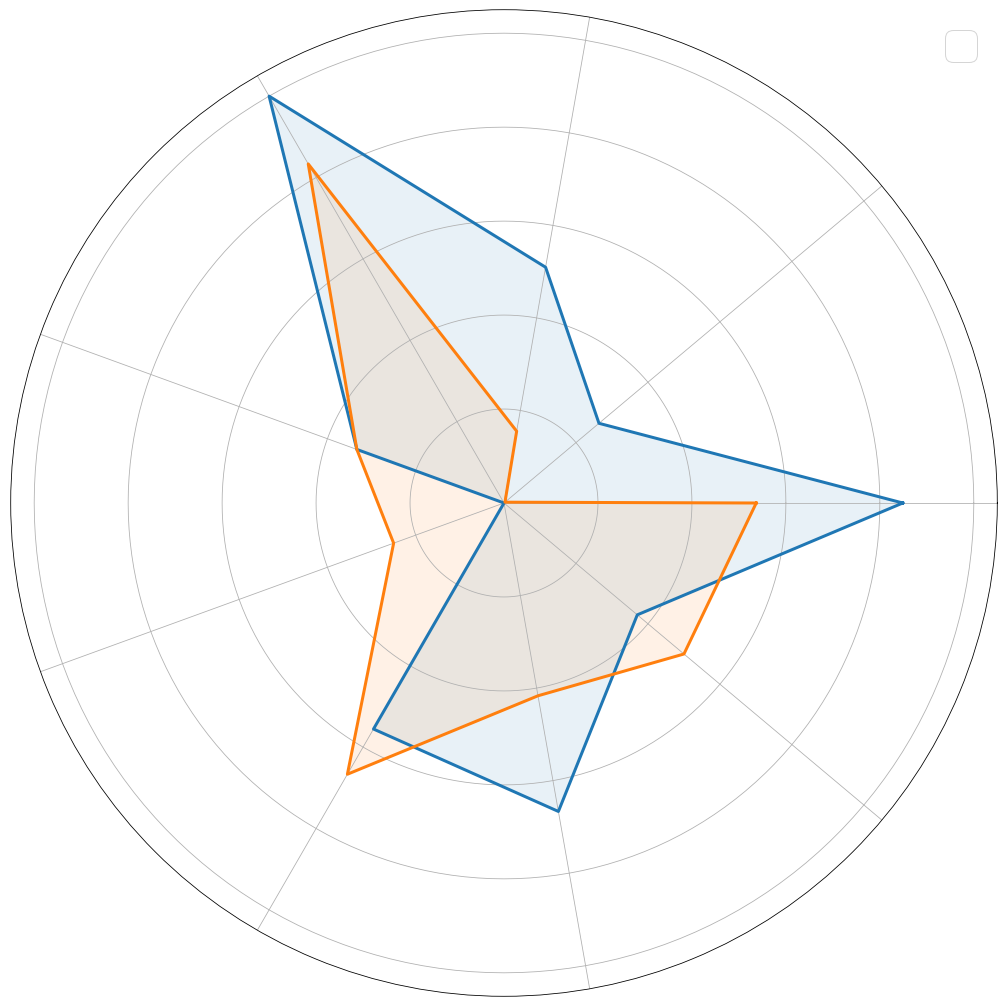

In [19]:
# plot average shape infos for outcome = 1
df_expert = selected_data_norm[selected_data_norm['Expert Level'] == 1].drop('Expert Level', axis=1)
df_expert.reset_index(inplace=True)
df_temp = pd.DataFrame(columns=df_expert.columns)
df_temp.loc[0] = df_expert.mean().values
# define figure
plt.rcParams.update({'font.size': 40})
f = plt.figure(figsize=(30,15))
ax = f.add_subplot(111, polar=True)
# draw and update axis
ax = plot_radar_chart(df_temp, 0, ax)
# plot average shape infos for outcome = 0
df_expert = selected_data_norm[selected_data_norm['Expert Level'] == 0].drop('Expert Level', axis=1)
df_expert.reset_index(inplace=True)
df_temp = pd.DataFrame(columns=df_expert.columns)
df_temp.loc[0] = df_expert.mean().values
# draw and update axis
ax = plot_radar_chart(df_temp, 0, ax)
cur_axes = plt.gca()
#cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticklabels([])
plt.tight_layout()
plt.legend()

# Linear correlations

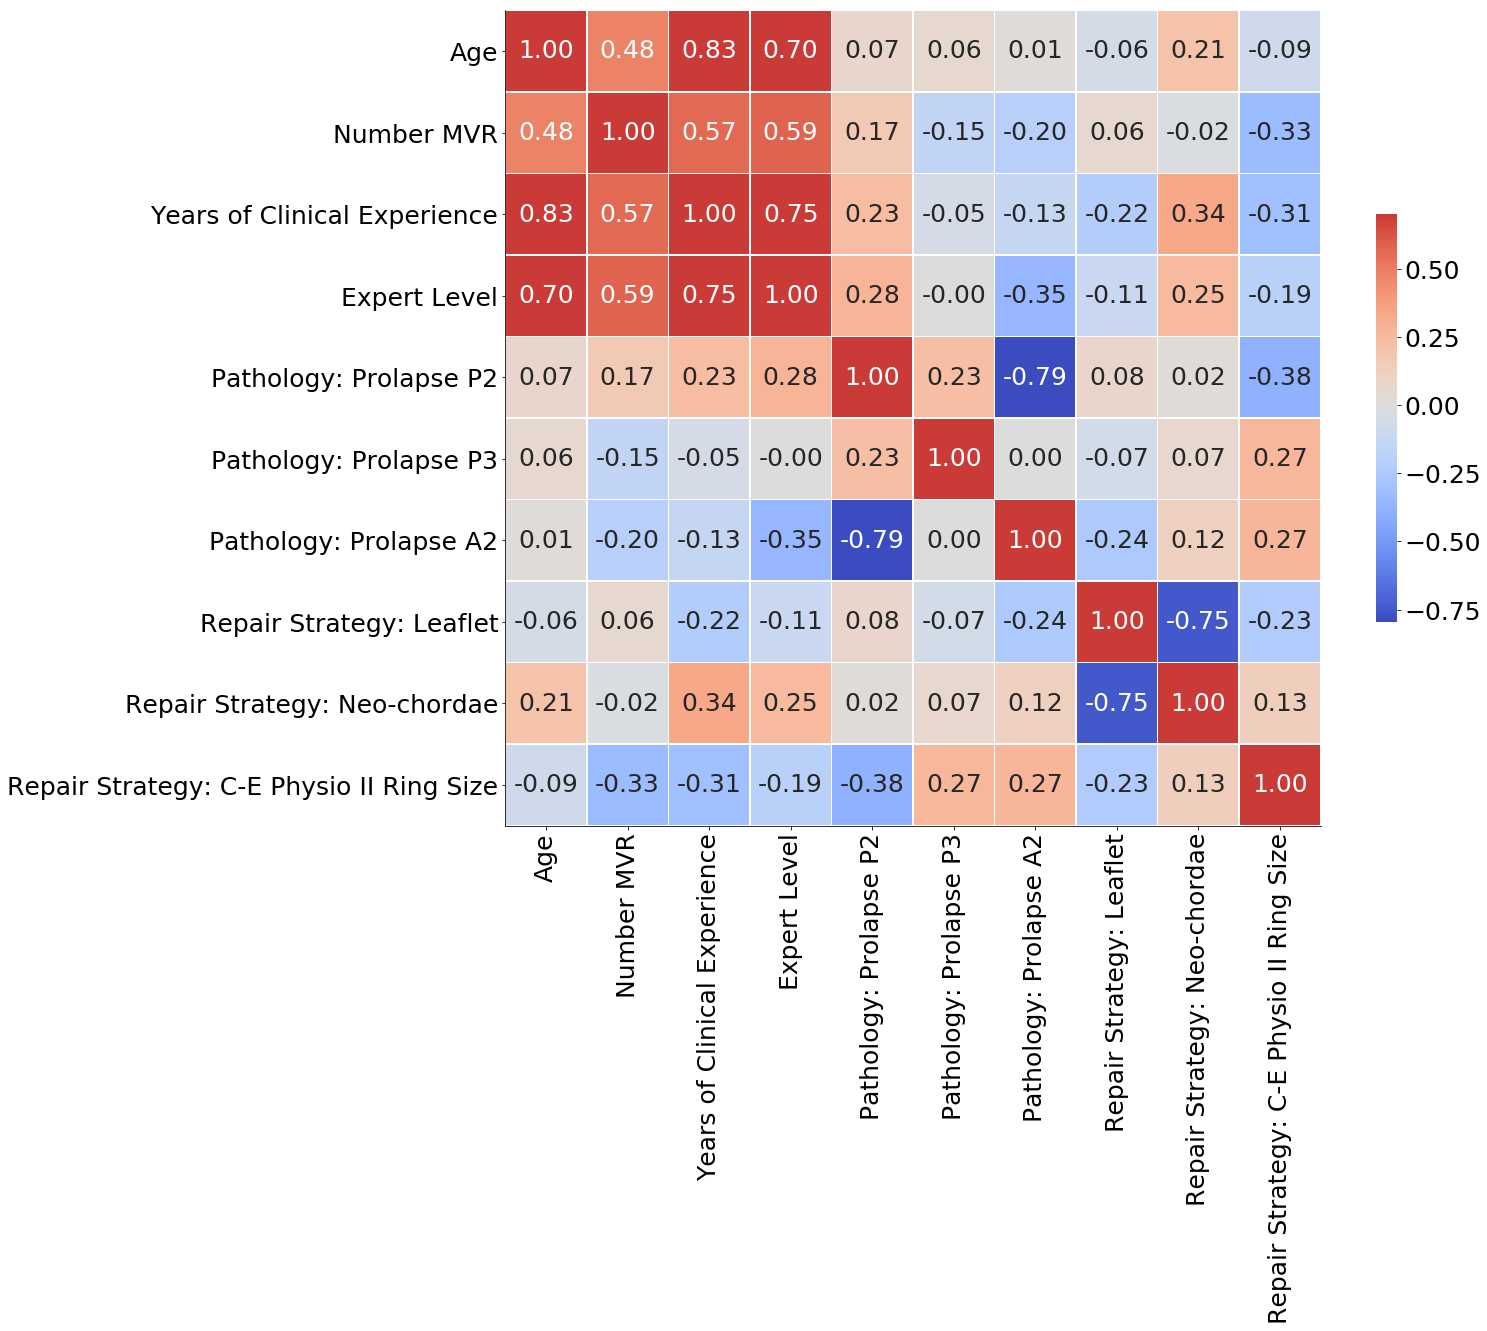

In [195]:
# plot corr heatmap with values
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(figsize=(14,10)) 
corr = selected_data_norm.corr()
g = se.heatmap(corr,  vmax=.7, center=0, ax=ax, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
se.despine()
g.figure.set_size_inches(20,15)
plt.show()

## Pairwise linear correlations

In [194]:
# same values as if
selected_data_norm[['Expert Level']].corrwith(selected_data_norm['Repair Strategy: C-E Physio II Ring Size'])

Expert Level   -0.193996
dtype: float64

In [ ]:
selected_data_norm[['Expert Level']].corrwith(selected_data_norm['Repair Strategy: C-E Physio II Ring Size'])

In [55]:
selected_data_norm

,Number of Physician 0_level_1,Age 1_level_1,N. Mitral Valve Repairs 2_level_1,Years of clinical Experiences 3_level_1,Expert 4_level_1,PathologyP2 Prolaps,PathologyProlaps P3,PathologyA2 Prolaps,Physio II Ring Size 8_level_1,Repair StrategiesResection,Repair StrategiesNeochorde,Repair StrategiesAnnuloplasty
0,0.047619,0.688525,0.000833,0.155172,0.0,0.0,0.0,1.0,0.95,0.0,1.0,1.0
1,0.095238,0.540984,0.003333,0.137931,0.0,1.0,0.0,0.0,0.95,1.0,0.0,1.0
2,0.142857,0.704918,0.125000,0.293103,1.0,1.0,1.0,0.0,1.00,0.0,1.0,1.0
3,0.190476,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.90,0.0,1.0,1.0
4,0.238095,0.508197,0.006667,0.120690,0.0,1.0,0.0,0.0,0.85,1.0,1.0,1.0
5,0.285714,0.491803,0.000000,0.086207,0.0,1.0,0.0,0.0,0.95,1.0,0.0,1.0
6,0.333333,0.639344,0.083333,0.224138,1.0,1.0,1.0,0.0,0.85,1.0,0.0,1.0
7,0.380952,0.786885,0.016667,0.413793,0.0,1.0,1.0,1.0,0.90,0.0,1.0,1.0
8,0.428571,0.803279,0.108333,0.413793,1.0,1.0,0.0,0.0,0.90,1.0,0.0,1.0
9,0.476190,0.901639,1.000000,0.603448,1.0,1.0,0.0,0.0,0.85,1.0,0.0,1.0
